In [30]:
%matplotlib inline

In [31]:
from matplotlib import pyplot as plt
import numpy as np

In [32]:
#each point is length, width, type (0, 1)

data = [[3,   1.5, 1],
        [2,   1,   0],
        [4,   1.5, 1],
        [3,   1,   0],
        [3.5, .5,  1],
        [2,   .5,  0],
        [5.5, 1,   1],
        [1,   1,   0]]

mystery_flower = [4.5, 1]

In [33]:
data[1][0] #access data

2

In [34]:
#network

#     O  flower type
#   /  \ w1, w2, b
#  O   O  length, width



In [35]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))
    
#derivative of sigmoid
def sigmoid_prime(x): 
    return sigmoid(x) * (1-sigmoid(x))

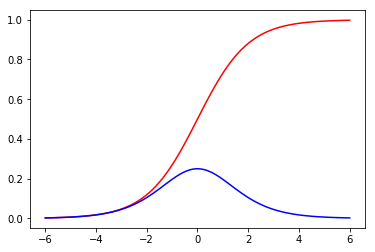

In [36]:
T = np.linspace(-6,6,100)
#print(T)
Y = sigmoid(T)
Z = sigmoid_prime(T)
plt.plot(T, Y, c='r')
plt.plot(T, Z, c='b')

[3, 1.5, 1]
[2, 1, 0]
[4, 1.5, 1]
[3, 1, 0]
[3.5, 0.5, 1]
[2, 0.5, 0]
[5.5, 1, 1]
[1, 1, 0]


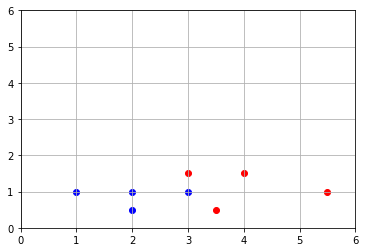

In [42]:
#scatter plot

plt.axis([0,6,0,6]) # x_min, x_max, y_min, y_max
plt.grid()

for i in range(len(data)):
    point = data[i]
    color = 'r'
    if point[2] == 0:
        color = 'b'
    plt.scatter(point[0], point[1], c=color)
        

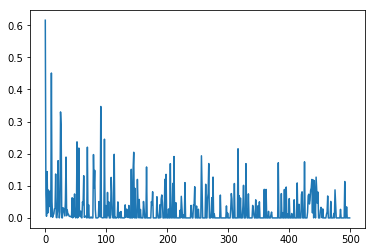

In [49]:
#training loop

learning_rate = 0.2
costs = [] 
w1 = np.random.randn()
w2 = np.random.randn()
b = np.random.randn()

for i in range(50000): #50,000 iteration
    r_i = np.random.randint(len(data)) #random index from data
    point = data[r_i]
    
    z = point[0]*w1 + point[1]*w2 + b
    pred = sigmoid(z)
    
    target = point[2]
    cost = np.square(pred - target) #sqaured error cost 
     
    
    dcost_pred = 2 * (pred - target)
    dpred_dz = sigmoid_prime(z)
    dz_dw1 = point[0] # because w1 is multiplied by point[0]
    dz_dw2 = point[1] # because w2 is multiplied by point[1]
    dz_db = 1 # because b is multiplied by 1
    
    dcost_dz = dcost_pred * dpred_dz

    dcost_dw1 =  dcost_dz * dz_dw1
    dcost_dw2 =  dcost_dz * dz_dw2
    dcost_db =  dcost_dz * dz_db  
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b = b - learning_rate * dcost_db
    
    if i % 100 == 0:
        cost_sum = 0
        for j in range(len(data)):
            point = data[r_i]
            
            z = point[0]*w1 + point[1]*w2 + b
            pred = sigmoid(z)
    
            target = point[2]
            cost_sum += np.square(pred - target)
        costs.append(cost_sum/len(data))
plt.plot(costs)
    

In [51]:
#seeing model prediction
# near 0 means blue(0) flower
# near 1 means red(1) flower 
for i in range(len(data)):
    point = data[i]
    print(point)
    z = point[0]*w1 + point[1]*w2 +b
    pred = sigmoid(z)
    print("pred: {}".format(pred))
    
    

[3, 1.5, 1]
pred: 0.7620098525959133
[2, 1, 0]
pred: 0.0006302406372175069
[4, 1.5, 1]
pred: 0.9996899672537098
[3, 1, 0]
pred: 0.38841346206474336
[3.5, 0.5, 1]
pred: 0.799903897366746
[2, 0.5, 0]
pred: 0.0001250721527799752
[5.5, 1, 1]
pred: 0.9999999510758568
[1, 1, 0]
pred: 6.26215437023553e-07


In [53]:
 print(w1,w2,b)

6.914792341887634 3.2354325532544577 -24.433795645378392


In [55]:
z = mystery_flower[0]*w1 + mystery_flower[1]*w2 +b
pred = sigmoid(z)
pred

0.9999507327853214

In [70]:
def which_flower(length, width):
    z = mystery_flower[0]*w1 + mystery_flower[1]*w2 +b
    pred = sigmoid(z)
    if pred < .5:
        print("blue")
    else:
        os.system("say 'red'")
    return pred

In [83]:
which_flower(1,2)

0.9999507327853214